In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model

import glob, os

# Set a random seed for reproducibility
random.seed(42)

In [3]:
base_path = './data/garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2527


In [4]:
# Parameters for Data augmentation for the training dataset
train_datagenerator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1,
    brightness_range=[0.7, 1.3],
    rotation_range=15
)

# Parameters for Data augmentation for the rest of the datasets (test and validation)
test_datagenerator = ImageDataGenerator(
    rescale=1./255
)

In [5]:
# Apply data augmentation for the training data
train_generator = train_datagenerator.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagenerator.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
)

test_generator = test_datagenerator.flow_from_directory(
	base_path,
	target_size = (150, 150),
	batch_size = 20,
	class_mode= 'categorical')

# Map class indices to class labels
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}

# Print the class labels
print("Class Labels:")
for label_index, label_name in labels.items():
    print(f"Class {label_index}: {label_name}")

Found 2276 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Class Labels:
Class 0: cardboard
Class 1: glass
Class 2: metal
Class 3: paper
Class 4: plastic
Class 5: trash


In [6]:
saved_model_path1 = './Trash1.h5'
saved_model_path2 = './Trash2.h5'
model1 = tf.keras.models.load_model(saved_model_path1)
model2 = tf.keras.models.load_model(saved_model_path2)

1/1 [==============================] - 4s 4s/step


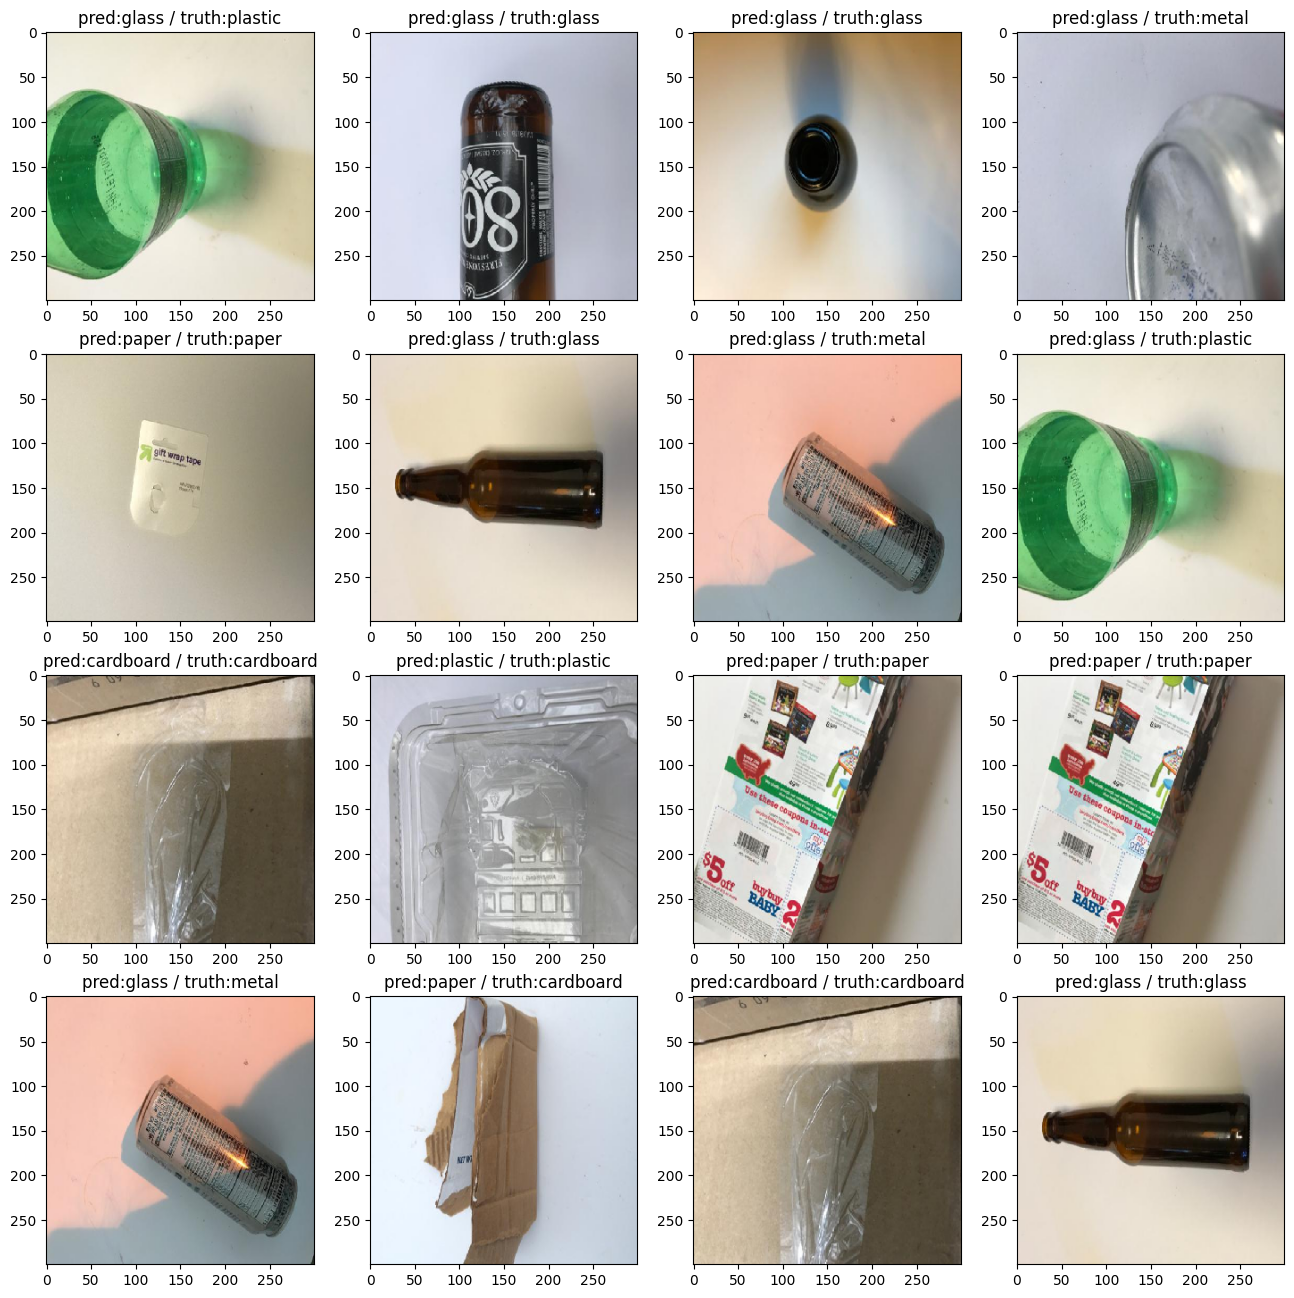

In [11]:
random_batch_index = np.random.randint(0, len(validation_generator))
test_x, test_y = validation_generator.__getitem__(random_batch_index)

preds = model1.predict(test_x)

plt.figure(figsize=(16, 16))
num_samples_to_display = 16

for i in range(num_samples_to_display):
    random_sample_index = np.random.randint(0, len(test_x))
    plt.subplot(4, 4, i + 1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[random_sample_index])], labels[np.argmax(test_y[random_sample_index])]))
    plt.imshow(test_x[random_sample_index])
plt.show()

1/1 [==============================] - 4s 4s/step


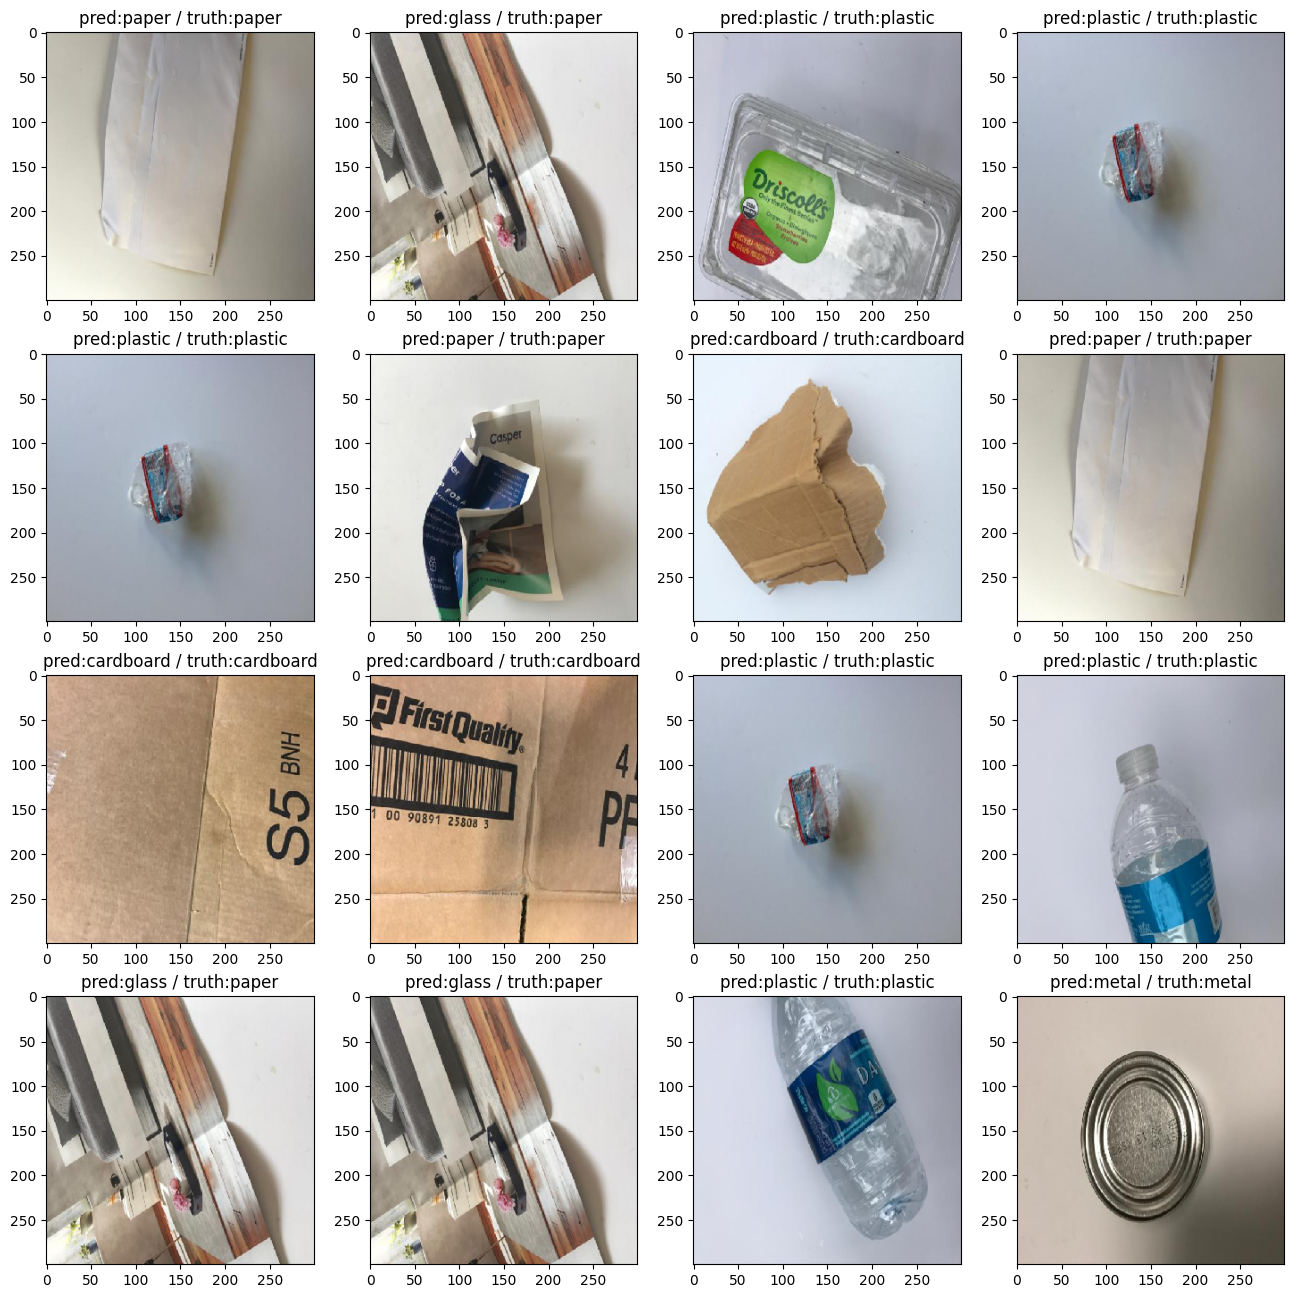

In [12]:
random_batch_index = np.random.randint(0, len(validation_generator))
test_x, test_y = validation_generator.__getitem__(random_batch_index)

preds = model2.predict(test_x)

plt.figure(figsize=(16, 16))
num_samples_to_display = 16

for i in range(num_samples_to_display):
    random_sample_index = np.random.randint(0, len(test_x))
    plt.subplot(4, 4, i + 1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[random_sample_index])], labels[np.argmax(test_y[random_sample_index])]))
    plt.imshow(test_x[random_sample_index])
plt.show()

1/1 [==============================] - 0s 390ms/step
Predicted Class: metal
Prediction Probabilities: [[0.0000000e+00 3.2404720e-25 1.0000000e+00 1.1940706e-30 2.2037706e-28
  7.0581336e-17]]


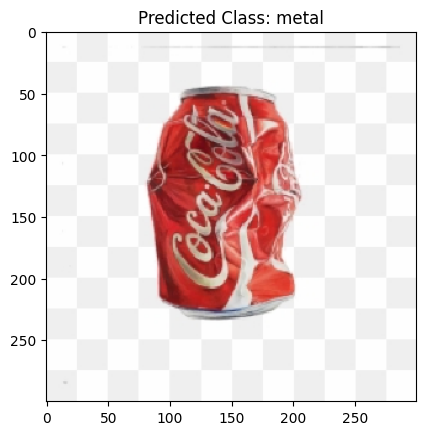

1/1 [==============================] - 1s 649ms/step
Predicted Class: metal
Prediction Probabilities: [[0.0000000e+00 1.3777183e-19 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.9136258e-27]]


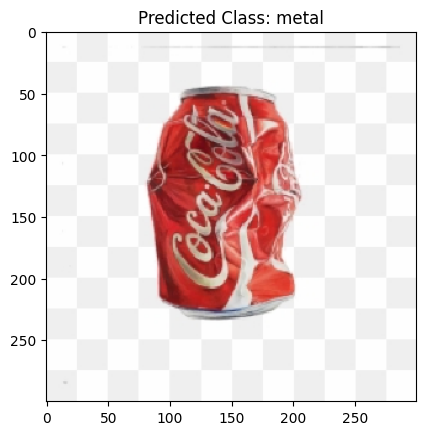

In [35]:
import tensorflow as tf
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

def load_and_predict_with_labels(model_path, image_path):
    class_labels = {
        0: 'cardboard',
        1: 'glass',
        2: 'metal',
        3: 'paper',
        4: 'plastic',
        5: 'trash'
    }
    loaded_model = tf.keras.models.load_model(model_path)
    img = image.load_img(image_path, target_size=(300, 300))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    prediction = loaded_model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_class_label = class_labels.get(predicted_class_index, "Unknown")
    print("Predicted Class:", predicted_class_label)
    print("Prediction Probabilities:", prediction)

    # Display the image
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class_label}')
    plt.show()

# Example usage:
image_path = './data2/metal5.png'  # Replace with the actual path to your image file
model_path1 = './Trash1.h5'
model_path2 = './Trash2.h5'

load_and_predict_with_labels(model_path1, image_path)
load_and_predict_with_labels(model_path2, image_path)